In [225]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

## Intro
In dit notebook wordt een machine learning model getrained om te voorspellen aan de hand van leeftijd, Gender, Speed_of_Impact, Helm gebruik en gordel gebruik of iemand een ongeluk wel of niet zal overleven.

## Inlezen

In [226]:
data = pd.read_csv('./accident.csv')

In [227]:
data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [228]:
data.shape


(200, 6)

Dus de data bevat 200 regels en 6 kolommen.

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


Dit geeft een mooie samenvatting van wat de inhoud is van de dataset. Zo zit er bij gender een null waarde. en bij speed_of_inpact zitten er 3. aangezien de totale dataset 200 is.

dubbel checken of er waardes ontbreken:

In [230]:
pd.DataFrame({
    'isna': data.isna().sum(),
})

,isna
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


Er ontbreken een aantal waardes. Omdat de dataset redelijk klein is is het waarschijnlijk niet verstandig om deze regels eruit te halen. \
Hoe gaan we dit wel oplossen ? De missing values van de speed of impact ga ik veranderen op basis van de mediaan. en de gender met de meest voorkomende gender.

In [231]:
median_speed = data['Speed_of_Impact'].median()
data['Speed_of_Impact'] = data['Speed_of_Impact'].fillna(median_speed)

In [232]:
gem_gender = data['Gender'].mode()[0]  # mode zoekt de meest voorkomede waardes
data['Gender'] = data['Gender'].fillna(gem_gender)

print('gemidelde gender:', gem_gender)

gemidelde gender: Female


In [233]:
pd.DataFrame({
    'isna': data.isna().sum(),
})

,isna
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0



Helmet_Used,Seatbelt_Used binair maken.

In [234]:
data_crash = data.replace({'Yes': 1, 'No': 0, 'Female':1, 'Male':0})

/tmp/ipykernel_818272/2094401123.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_crash = data.replace({'Yes': 1, 'No': 0, 'Female':1, 'Male':0})


In [235]:
data_crash.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,1,27.0,0,0,1
1,69,1,46.0,0,1,1
2,46,0,46.0,1,1,0
3,32,0,117.0,0,1,0
4,60,1,40.0,1,1,0


De Yes/No en Female/male zijn nu binair.

Bij het kiezen van een algoritme moeten we eraan ddenken dat de dataset relatief klein is, dus gevoelig voor overfitting.

In [236]:
# type(data_crash["Survived"])
data_crash.Survived

0      1
1      1
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Survived, Length: 200, dtype: int64

### visualizatie

Laten we nu een paar plotjes maken om een beter beeld te krijgen van de dataset.

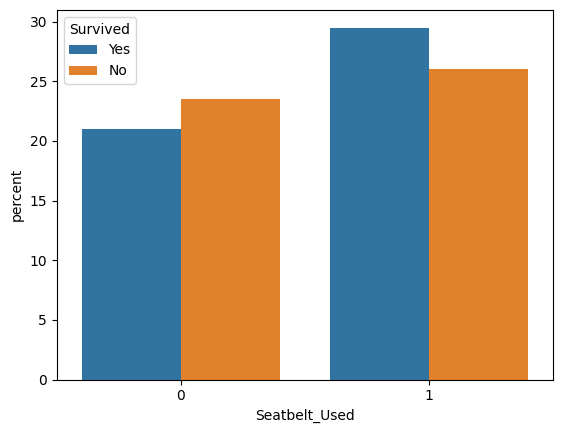

In [237]:
# zodat de namen leesbaarder zijn voor de plot
data_plot = data_crash.copy()
data_plot['Survived'] = data_plot['Survived'].replace({1: 'Yes', 0: 'No', 'Female':1, 'Male':0})


seatbelt_plot = sns.countplot(data_plot, x = 'Seatbelt_Used', hue = "Survived", stat="percent")

# title: 'Aantal overlevenden vs. niet-overlevenden'


Je ziet in de plot dat meer mensen een gordel hebben gebruikt. ook zie je dat van de mensen die hem niet hebben gebruikt meer mensen het niet overleven en van de mensen die hem wel hebben gebruit meer mensen het juist wel overleven.

<Axes: xlabel='Survived', ylabel='Speed_of_Impact'>

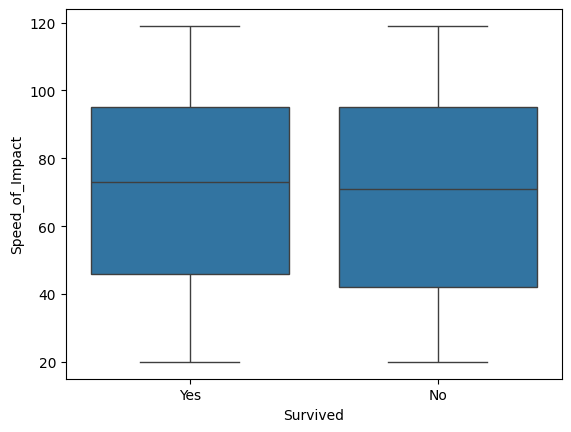

In [238]:
sns.boxplot(data_plot, x ='Survived', y = 'Speed_of_Impact')

Je ziet dat de gemiddelde snelheid een klein beter lager was bij de mensen die het niet overleefden

<Axes: xlabel='Age', ylabel='Speed_of_Impact'>

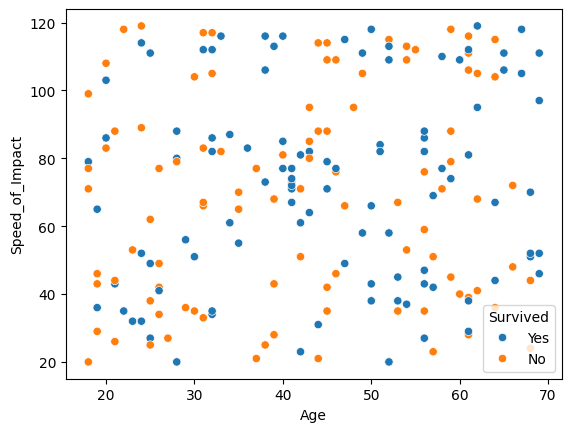

In [239]:
sns.scatterplot(data_plot, x = 'Age', y = 'Speed_of_Impact', hue = 'Survived')

Hier is niet heel veel uit te halen. Alles lijkt mogelijk als je alleen de leeftijd en snelheid van impact weet.

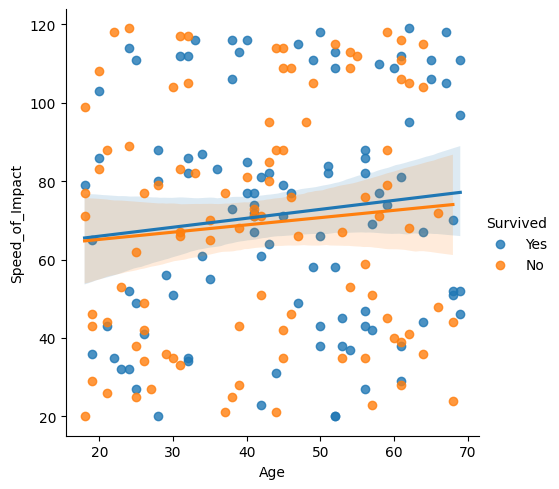

In [240]:
sns.lmplot(data_plot, x = 'Age', y = 'Speed_of_Impact', hue = 'Survived')

Hier een vergelijkbare plot, maar dan als lmplot. Wederom zegt het niet heel veel lijkt.

## train - test split

Nu gaan we het opdelen in train en test.

In [241]:
from sklearn.model_selection import train_test_split

# y gaan we voorspellen, X is de rest van de data
X = data_crash[['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']]
y = data_crash['Survived']

# 'stratify=y' zorgt ervoor dat hij van elke soort evenveel pakt
# `random_state` kiest een manier van splitsen, dit zorgt ervoor dat hij steeds hetzelfde splits als ik hetzelfde getal invul
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)



In [242]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}') 

X_train: (160, 5), X_test: (40, 5)


Dus de trainingsset is nu 160 rijen (met de 5 kolommen) en de testset is 40 rijen (met de 5 kolommen).

In [243]:
X_train.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used
134,57,0,42.0,1,1
45,26,0,77.0,1,1
105,41,0,73.0,0,0
31,44,0,114.0,0,1
8,36,1,83.0,1,0


Het is een classificatie en geen regressie probleem, want wel of niet overleefd.

In [244]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    DummyClassifier,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    RandomForestClassifier,
]

In [245]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

metric_scores = {}
for model in models:
    fitted = model().fit(X_train, y_train)
    y_pred = fitted.predict(X_test)
    y_prob = fitted.predict_proba(X_test)
    metric_scores[model.__name__] = [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred, average="macro"),
        roc_auc_score(y_test, y_prob[:, 1])  # omdast t binair is
    ]

# dataframe van maken
pd.DataFrame(metric_scores, index=["ACC", "$F_1$", "AUC"]).T

,ACC,$F_1$,AUC
DummyClassifier,0.500,0.333333,0.50000
DecisionTreeClassifier,0.525,0.517460,0.52500
KNeighborsClassifier,0.475,0.472030,0.46625
RandomForestClassifier,0.450,0.448622,0.47500


De dummyclasifier is zoals verwacht 50% accuracy. Aangezien het binair is en maar twee opties heeft. De accuracy van de decisiontree is iets beter maar nog steeds laag. de KNeigheighbors is nog lager dan de dummie. en de random forest is hetzelfde als de dummy.

Verder is de F_1 score van alle beter dan de dummy, maar ook hierin lijkt de decisiontree het beste. En van de AUC is alleen de decisiontree beter dan de dummy.

Dit is niet zo'n goede uitslag. de beste lijkt nu de decisiontree te zijn, maar deze is ook niet super.

Laten we kijken of de verdeleing een beetje oke is in de binaire kolommen.

In [246]:
columns = ['Gender', 'Helmet_Used', 'Seatbelt_Used', 'Survived']

for column in columns:
    print(f"Value counts voor {column}:")
    print(data_crash[column].value_counts())

Value counts voor Gender:
Gender
1    111
0     89
Name: count, dtype: int64
Value counts voor Helmet_Used:
Helmet_Used
1    111
0     89
Name: count, dtype: int64
Value counts voor Seatbelt_Used:
Seatbelt_Used
1    111
0     89
Name: count, dtype: int64
Value counts voor Survived:
Survived
1    101
0     99
Name: count, dtype: int64


Dit lijkt prima verdeelt te zijn. andere modellen ook eerst proberen:

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

models_2 = [
    LogisticRegression,
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
    GaussianNB,
    AdaBoostClassifier
]

In [248]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

metric_scores = {}
for model in models_2:
    fitted = model().fit(X_train, y_train)
    y_pred = fitted.predict(X_test)
    y_prob = fitted.predict_proba(X_test)
    metric_scores[model.__name__] = [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred, average="macro"),
        roc_auc_score(y_test, y_prob[:, 1])  # omdast t binair is
    ]

# dataframe van maken
pd.DataFrame(metric_scores, index=["ACC", "$F_1$", "AUC"]).T

,ACC,$F_1$,AUC
LogisticRegression,0.500,0.498747,0.5425
LinearDiscriminantAnalysis,0.475,0.472030,0.5450
QuadraticDiscriminantAnalysis,0.525,0.522313,0.5300
GaussianNB,0.475,0.472030,0.5425
AdaBoostClassifier,0.475,0.474672,0.4000


ook hierin is alleen de QuadraticDiscriminantAnalysis beter dan de dummy.

laten we de age en speed_pf_impact schalen van de testdata, zodat de clasifiers er hopelijk beter mee om kunnen gaan.

In [249]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

opnieuw modellen testen:

In [250]:
models_all = [
    DummyClassifier,
    DecisionTreeClassifier,
    LogisticRegression,
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    AdaBoostClassifier
]

In [251]:
metric_scores = {}
for model in models_all:
    fitted = model().fit(X_train, y_train)
    y_pred = fitted.predict(X_test)
    y_prob = fitted.predict_proba(X_test)
    metric_scores[model.__name__] = [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred, average="macro"),
        roc_auc_score(y_test, y_prob[:, 1])
    ]
    
pd.DataFrame(metric_scores, index=["ACC", "$F_1$", "AUC"]).T

,ACC,$F_1$,AUC
DummyClassifier,0.500,0.333333,0.50000
DecisionTreeClassifier,0.525,0.517460,0.52500
LogisticRegression,0.500,0.498747,0.54250
LinearDiscriminantAnalysis,0.475,0.472030,0.54500
QuadraticDiscriminantAnalysis,0.525,0.522313,0.53000
GaussianNB,0.475,0.472030,0.54250
KNeighborsClassifier,0.475,0.472030,0.46625
RandomForestClassifier,0.450,0.448622,0.50750
AdaBoostClassifier,0.475,0.474672,0.40000


de decsiion tree is ietsje beter geworden (iets hogere F_1 waarde), \
de logistic is ook iets beter geworden (hoegere F_1 waard en AUC iets hoger), \
de LinearDiscriminantAnalysis is de F-1 iets hoger, maat de auc iets lager, \
de randomforest is slechter geworden juist, \
en de rest is hetzelfde gebleven.

laten we cros validatie proberen toe te passen voor een beter beeld:

In [252]:
from sklearn.model_selection import cross_val_score

for model in models_all:
    model_new = model()
    print(model_new)
    cv_scores = cross_val_score(model_new, X_train_scaled, y_train)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Gemiddelde score: {cv_scores.mean()}")
    print("")

DummyClassifier()
Cross-validation scores: [0.46875 0.5     0.5     0.5     0.5    ]
Gemiddelde score: 0.49375

DecisionTreeClassifier()
Cross-validation scores: [0.375   0.59375 0.46875 0.5625  0.59375]
Gemiddelde score: 0.51875

LogisticRegression()
Cross-validation scores: [0.53125 0.625   0.5625  0.53125 0.53125]
Gemiddelde score: 0.55625

LinearDiscriminantAnalysis()
Cross-validation scores: [0.53125 0.625   0.5625  0.53125 0.53125]
Gemiddelde score: 0.55625

QuadraticDiscriminantAnalysis()
Cross-validation scores: [0.53125 0.65625 0.65625 0.4375  0.75   ]
Gemiddelde score: 0.60625

GaussianNB()
Cross-validation scores: [0.53125 0.59375 0.46875 0.5     0.5    ]
Gemiddelde score: 0.51875

KNeighborsClassifier()
Cross-validation scores: [0.5     0.65625 0.625   0.5     0.53125]
Gemiddelde score: 0.5625

RandomForestClassifier()
Cross-validation scores: [0.53125 0.5625  0.5     0.5     0.625  ]
Gemiddelde score: 0.54375

AdaBoostClassifier()
Cross-validation scores: [0.4375  0.59375 

Aangezien de QuadraticDiscriminantAnalysis de hoogste cross-validation score heeft nu: 0.60625 (en auc, F_1 en ACC oook hoogste is). gaan we hier mee verder.


### Trainen

laten we beginnen met trainen.

In [253]:
from sklearn.feature_selection import SelectKBest

# kiest alle 5 de kolommen om mee te nemen, daarna 4, daarna 3, etc.

metric_scores = {}
k = 5
while k:
    k_select = SelectKBest(k=k)
    X_train_select= k_select.fit_transform(X_train, y_train)
    X_test_select = k_select.transform(X_test)

    model_qda = QuadraticDiscriminantAnalysis()
    fitted = model_qda.fit(X_train_select, y_train)
    y_pred = fitted.predict(X_test_select)
    y_prob = fitted.predict_proba(X_test_select)
    metric_scores[f"QDA, {k} features"] = [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred, average="macro"),
        roc_auc_score(y_test, y_prob[:, 1])
        ]
    k -= 1

pd.DataFrame(metric_scores, index=["$ACC$", "$F_1$", "$AUC$"]).T

,$ACC$,$F_1$,$AUC$
"QDA, 5 features",0.525,0.522313,0.53000
"QDA, 4 features",0.625,0.624765,0.55750
"QDA, 3 features",0.525,0.524703,0.53375
"QDA, 2 features",0.475,0.447005,0.43875
"QDA, 1 features",0.475,0.472030,0.47500


Hij doet het het beste met 4 features.

GridSearchCV bestaat ! daarmee kan je de beste parameters vinden.

In [254]:
from sklearn.model_selection import GridSearchCV

# de parameters en de opties daarvan
params = {
    'priors': [None, [0.5, 0.5], [0.6, 0.4], [0.7, 0.3]],
    'reg_param': [0.0, 0.1, 0.5, 1.0], # voor de overfitting
    'store_covariance': [True, False]
}

# kijkt wat de beste opties zijn per parameter !!
grid_search = GridSearchCV(QuadraticDiscriminantAnalysis(), params, cv=5)
grid_search.fit(X_train_select, y_train)
print("Beste hyperparameters:", grid_search.best_params_)

Beste hyperparameters: {'priors': None, 'reg_param': 0.0, 'store_covariance': True}


Hieruit komt dus dat `'priors': None, 'reg_param': 0.0, 'store_covariance': True` moeten zijn.

In [255]:
# trainen qda met beste params
qda_params = QuadraticDiscriminantAnalysis(priors = None, reg_param = 0.0, store_covariance = True)
qda_params.fit(X_train_select, y_train)


QuadraticDiscriminantAnalysis(store_covariance=True)

In [256]:
y_pred = qda_params.predict(X_test_select)
y_prob = qda_params.predict_proba(X_test_select)


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
auc = roc_auc_score(y_test, y_prob[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")


Accuracy: 0.475
F1-score: 0.47203016970458833
AUC: 0.47500000000000003


Ik snap niet waarom hij nou slechter wordt.

Roc curve maken nog:

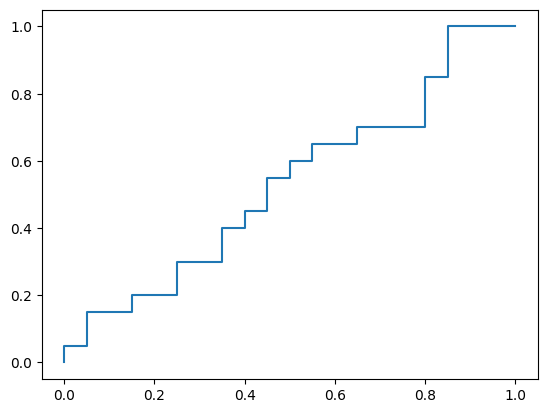

In [257]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# traint model met QDA
model_best = QuadraticDiscriminantAnalysis()
model_best.fit(X_train, y_train)

y_prob = model_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.plot(fpr, tpr, label=f"Random Forest AUC: {auc:.2f}")

Uit de plot kun je ook zien dat t niet een top model is. Je zou hem opzich gerust zeer slecht kunnen noemen.

Tijdens het terug lezen erachter gekomen dat ik de features helemaal vergeten was te gebruiken. Bij deze:

In [258]:
# Selecteer de 4 beste features
k_select = SelectKBest(k=4)
X_train_select = k_select.fit_transform(X_train, y_train)
X_test_select = k_select.transform(X_test)

# Trainen
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train_select, y_train)

# voorspellingen
y_pred = model_qda.predict(X_test_select)
y_prob = model_qda.predict_proba(X_test_select)

# hoe goec is ie
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
auc = roc_auc_score(y_test, y_prob[:, 1])

# Resultaten in een DataFrame zetten
metric_scores = {
    "$ACC$": accuracy,
    "$F_1$": f1,
    "$AUC$": auc
}

pd.DataFrame(metric_scores, index=[0]).T


,0
$ACC$,0.625000
$F_1$,0.624765
$AUC$,0.557500


Dit is inderdaad beter ! Hoger dan dit ga ik het ben ik bang niet krijgen.

De dataset is erg klein. Ik vermoed nu dat dat ervoor zorgt dat de score niet veel hoger wordt. Je kunt mogelijk nog meer data generen en daarop verder gaan. Maar dan kan er overfitting veroorzaakt worden.